# §2 時系列データの観察と要約

In [1]:
from __future__ import unicode_literals
from __future__ import print_function
import six
import sys
import os
import math
import numpy as np
import scipy
import statsmodels.sandbox.stats.runs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyper

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'IPAexGothic'

In [2]:
sys.version

'2.7.13 |Anaconda 4.3.1 (x86_64)| (default, Dec 20 2016, 23:05:08) \n[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]'

## 演習用データをロード

In [3]:
r = pyper.R(use_numpy='True', use_pandas='True')

In [4]:
r('load("./cache/data.RData")')

'try({load("./cache/data.RData")})\n'

## §2-1 時系列データを観測する

In [5]:
df = pd.DataFrame(r.get('price4'))

df.rename(columns={' x5202 ': 'x5202',
                   ' x7272 ': 'x7272',
                   ' x4927 ': 'x4927',
                   ' x4502 ': 'x4502'},
          inplace=True)

df.columns

Index([u'x5202', u'x7272', u'x4927', u'x4502'], dtype='object')

In [6]:
df.describe()

,x5202,x7272,x4927,x4502
count,121.000000,121.000000,121.000000,121.000000
mean,92.396694,968.826446,2633.157025,4199.380165
std,20.128537,187.338449,209.862892,571.487303
min,55.000000,668.000000,2363.000000,3500.000000
25%,73.000000,780.000000,2467.000000,3710.000000
50%,96.000000,948.000000,2525.000000,3865.000000
75%,110.000000,1098.000000,2832.000000,4700.000000
max,124.000000,1334.000000,3085.000000,5280.000000


In [7]:
df.columns

Index([u'x5202', u'x7272', u'x4927', u'x4502'], dtype='object')

### 株価(割合)の時系列プロット

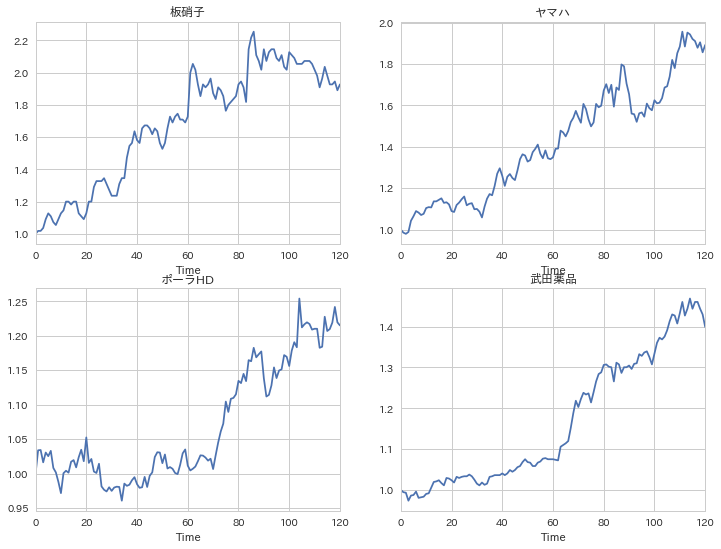

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
[ax.set_xlabel('Time') for ax in axes.ravel()]

(df['x5202'] / df['x5202'][0]).plot(ax=axes[0][0])
axes[0][0].set_title('板硝子')

(df['x7272'] / df['x7272'][0]).plot(ax=axes[0][1])
axes[0][1].set_title('ヤマハ')

(df['x4927'] / df['x4927'][0]).plot(ax=axes[1][0])
axes[1][0].set_title('ポーラHD')

(df['x4502'] / df['x4502'][0]).plot(ax=axes[1][1])
axes[1][1].set_title('武田薬品')

### 4銘柄の収益率の時系列プロット
収益率は以下の式で算出



In [9]:
df_return_rate = (np.log(df) * 100).diff(axis=0)

df_return_rate.describe()

,x5202,x7272,x4927,x4502
count,120.000000,120.000000,120.000000,120.000000
mean,0.546755,0.531140,0.162315,0.279897
std,3.565816,2.638556,1.546933,1.133956
min,-6.669137,-6.413596,-3.578129,-2.710193
25%,-1.785762,-1.309304,-0.624143,-0.352904
50%,0.000000,0.372419,0.153384,0.141643
75%,2.254998,2.406774,1.095011,0.927286
max,16.551444,7.097573,5.805499,3.562168


収益率を可視化することにより、板硝子、ヤマハ、ポーラHD、武田薬品の順にボラティリティが大きいことが直観的にわかる

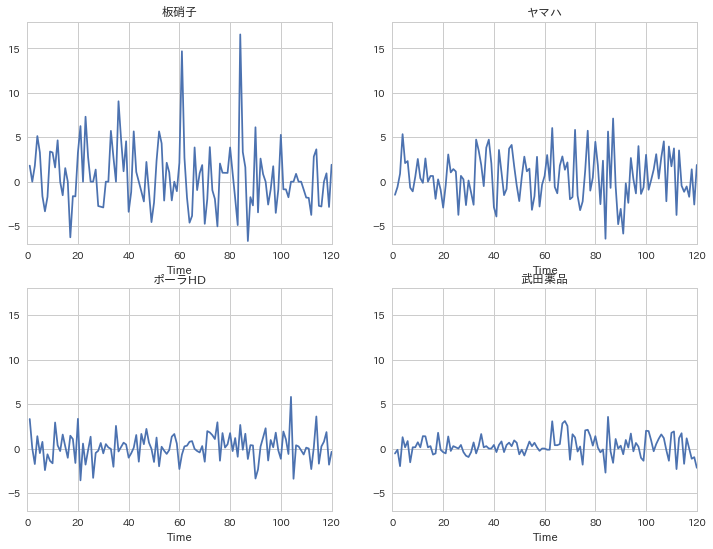

In [10]:
df_return_rate = (np.log(df) * 100).diff(axis=0)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
[ax.set_ylim(-7, 18) for ax in axes.ravel()]
[ax.set_xlabel('Time') for ax in axes.ravel()]

df_return_rate['x5202'].plot(ax=axes[0][0])
axes[0][0].set_title('板硝子')

df_return_rate['x7272'].plot(ax=axes[0][1])
axes[0][1].set_title('ヤマハ')

df_return_rate['x4927'].plot(ax=axes[1][0])
axes[1][0].set_title('ポーラHD')

df_return_rate['x4502'].plot(ax=axes[1][1])
axes[1][1].set_title('武田薬品')

## §2-2 時系列データの分布と要約

### 4銘柄の収益率を抽出

In [11]:
df = pd.DataFrame(r.get('return4'))

df.rename(columns={' x5202 ': 'x5202',
                   ' x7272 ': 'x7272',
                   ' x4927 ': 'x4927',
                   ' x4502 ': 'x4502'},
          inplace=True)

df.columns

Index([u'x5202', u'x7272', u'x4927', u'x4502'], dtype='object')

`std`が各銘柄のボラティリティに相当

In [12]:
df.describe()

,x5202,x7272,x4927,x4502
count,120.000000,120.000000,120.000000,120.000000
mean,0.546755,0.531140,0.162315,0.279897
std,3.565816,2.638556,1.546933,1.133956
min,-6.669137,-6.413596,-3.578129,-2.710193
25%,-1.785762,-1.309304,-0.624143,-0.352904
50%,0.000000,0.372419,0.153384,0.141643
75%,2.254998,2.406774,1.095011,0.927286
max,16.551444,7.097573,5.805499,3.562168


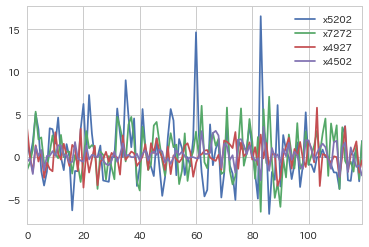

In [13]:
df.plot()

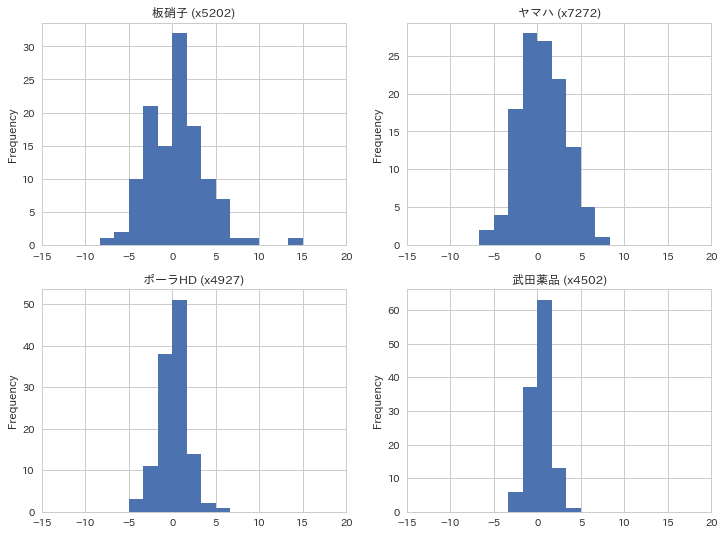

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
[ax.set_xlim(-15, 20) for ax in axes.ravel()]
[ax.set_ylabel('Frequency') for ax in axes.ravel()]
bins=np.linspace(-15, 15, 19)

df['x5202'].hist(ax=axes[0][0], bins=bins)
axes[0][0].set_title('板硝子 (x5202)')

df['x7272'].hist(ax=axes[0][1], bins=bins)
axes[0][1].set_title('ヤマハ (x7272)')

df['x4927'].hist(ax=axes[1][0], bins=bins)
axes[1][0].set_title('ポーラHD (x4927)')

df['x4502'].hist(ax=axes[1][1], bins=bins)
axes[1][1].set_title('武田薬品 (x4502)')

### 相関係数行列を表示する

In [15]:
df.corr().style.applymap(lambda s: 'font-weight: bold' if abs(s) >= 0.4 else '')

### 散布図行列を表示する

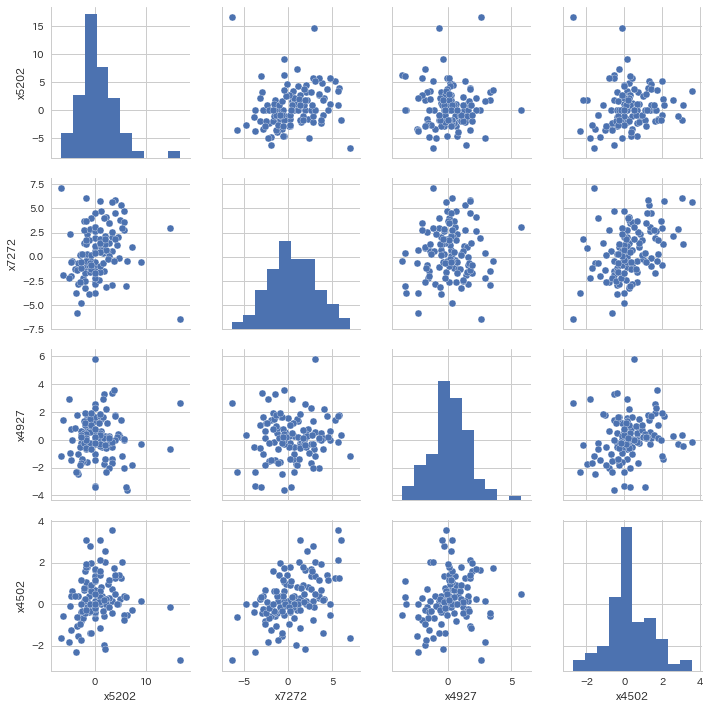

In [16]:
#pd.tools.plotting.scatter_matrix(df, diagonal='kde', alpha=0.3, figsize=(12,9))
sns.pairplot(df)

## §2-3 統計的仮説検定について

### Shapiro-Wilk検定
- https://ja.wikipedia.org/wiki/%E3%82%B7%E3%83%A3%E3%83%94%E3%83%AD%E2%80%93%E3%82%A6%E3%82%A3%E3%83%AB%E3%82%AF%E6%A4%9C%E5%AE%9A
- Wおよびp値により正規分布に従っているかを判定する

In [17]:
scipy.stats.shapiro(df['x4927']) # Wおよびp-valueを返す

(0.9832317233085632, 0.14187775552272797)

In [18]:
print('板硝子',    scipy.stats.shapiro(df['x5202']))
print('ヤマハ',    scipy.stats.shapiro(df['x7272']))
print('ポーラHD',  scipy.stats.shapiro(df['x4927']))
print('武田薬品',  scipy.stats.shapiro(df['x4502']))

板硝子 (0.9240832328796387, 4.189378159935586e-06)
ヤマハ (0.9949772357940674, 0.9483349919319153)
ポーラHD (0.9832317233085632, 0.14187775552272797)
武田薬品 (0.9846038818359375, 0.18925489485263824)


### 連の検定 (Runs Test)
- 2値(この場合は`+`と`-`)の並びに規則性があるかどうかを判定する

In [19]:
(df['x7272'] < df['x7272'].mean())[:20].values

array([ True,  True, False, False, False, False,  True,  True, False,
       False,  True,  True, False,  True, False, False,  True,  True,
        True,  True], dtype=bool)

有意水準を10%とすると、ポーラHDだけがギリギリそれを下回っているため、`+`,`-`の並びに何らかの規則性(偏り)があると判断できる

In [20]:
def runs_test(df, col_name):
    return statsmodels.sandbox.stats.runs.runstest_1samp((df[col_name] < df[col_name].mean()).values)

print('板硝子',   runs_test(df, 'x5202'))
print('ヤマハ',   runs_test(df, 'x7272'))
print('ポーラHD', runs_test(df, 'x4927'))
print('武田薬品', runs_test(df, 'x4502'))

板硝子 (-1.370583674188359, 0.17050477510198525)
ヤマハ (-0.17131505814909112, 0.86397604080434331)
ポーラHD (1.6501155583571119, 0.098919303187130658)
武田薬品 (-0.12194196057421446, 0.90294498384482413)


## §2-4 時間依存の発見

In [21]:
df_xprice  = pd.DataFrame(r.get('X.price'),  columns={'X.price'})
df_xreturn = pd.DataFrame(r.get('X.return'), columns={'X.return'})
df_yprice  = pd.DataFrame(r.get('Y.price'),  columns={'Y.price'})
df_yreturn = pd.DataFrame(r.get('Y.return'), columns={'Y.return'})

### 株価と収益率の推移

Xは株価の上昇・下落と収益率の正・負がおおよそ同じ期間に現れている

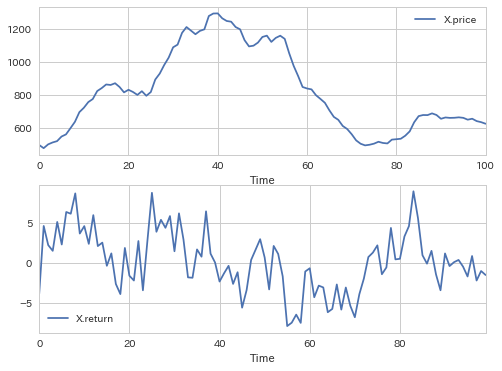

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
[ax.set_xlabel('Time') for ax in axes.ravel()]

df_xprice.plot(ax=axes[0])
df_xreturn.plot(ax=axes[1])

Yは株価の上昇・下落局面に対し収益率の正・負という形では現れていない

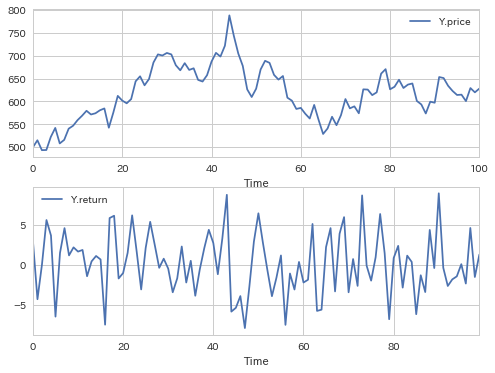

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
[ax.set_xlabel('Time') for ax in axes.ravel()]

df_yprice.plot(ax=axes[0])
df_yreturn.plot(ax=axes[1])

### 収益率の要約統計量とヒストグラム

- XとYの傾向はほぼ一致 (今回は作られたデータなので)
- 言い換えると時間に依存する傾向はこれらの母数やヒストグラムでは確認できない

In [24]:
pd.concat([df_xreturn, df_yreturn], axis=1).describe()

,X.return,Y.return
count,100.000000,100.000000
mean,0.228029,0.228029
std,3.784666,3.784666
min,-7.896230,-7.896230
25%,-2.223212,-2.223212
50%,0.387017,0.387017
75%,2.439527,2.439527
max,8.987181,8.987181


array([<matplotlib.axes._subplots.AxesSubplot object at 0x119f69710>], dtype=object)

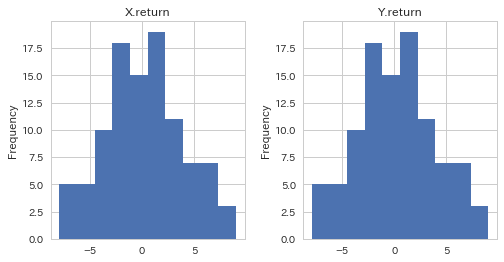

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
[ax.set_ylabel('Frequency') for ax in axes.ravel()]

df_xreturn.hist(ax=axes[0], bins=10)
df_yreturn.hist(ax=axes[1], bins=10)